## PCA
Учитывая, что у нас большое кол-во признаков, и мы не можем их интерпретировать из-за того, что они анонимные, попробуем применить метод главных компонент для уменьшения размерности данных. Возьмём компоненты, объясняющие 80% дисперсии данных.



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data_path = "data/cleaned_data.csv"
df = pd.read_csv(data_path)

Нормализуем данные и применим PCA.

In [3]:
features_for_pca = df.drop(columns=["rank", "query_id"])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

In [4]:
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

Визуализируем пару первых компонент.

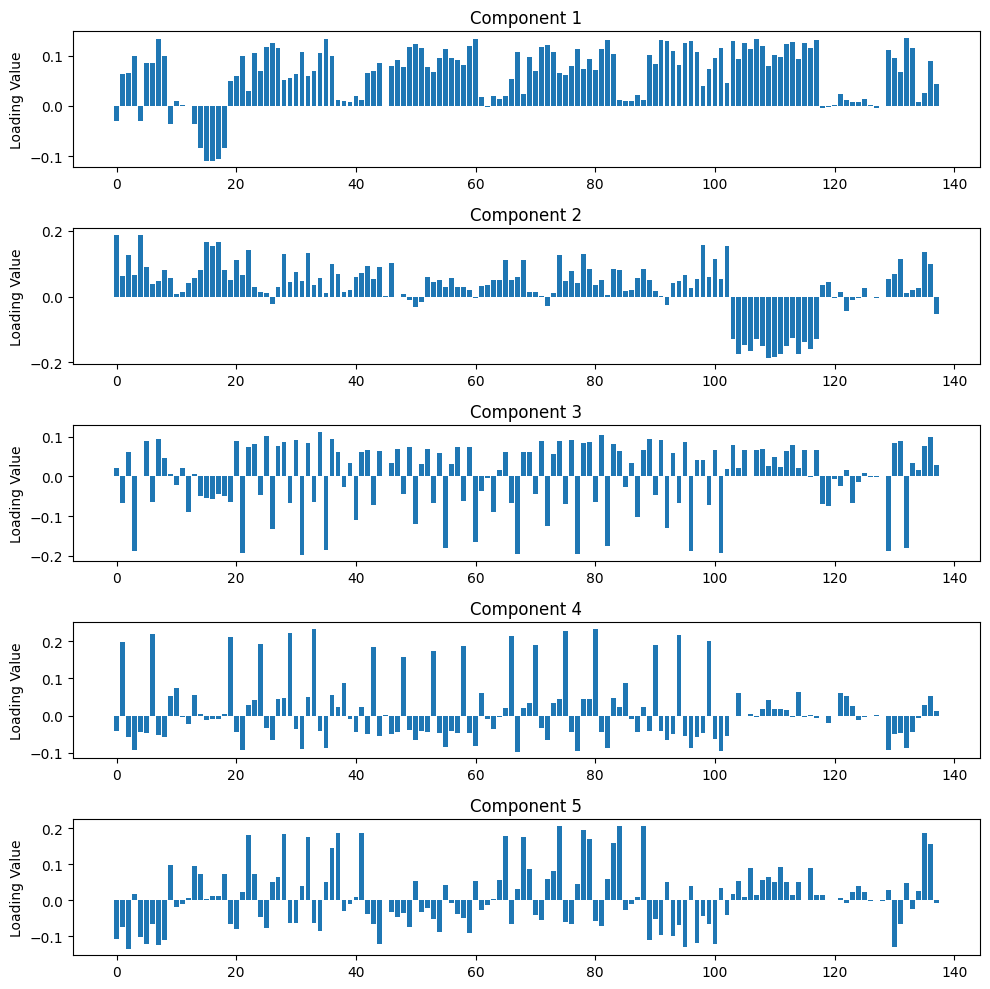

In [5]:
num_components = 5
loadings = pca.components_[:num_components]

fig, axes = plt.subplots(nrows=num_components, figsize=(10, num_components * 2), dpi=100)

for i, ax in enumerate(axes):
    components_loadings = loadings[i]
    ax.bar(range(len(components_loadings)), components_loadings)
    ax.set_title(f"Component {i+1}")
    ax.set_ylabel("Loading Value")

plt.tight_layout()
plt.show()

In [6]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
explained_variance, cumulative_variance

(array([1.81839659e-01, 1.29642046e-01, 7.92575692e-02, 7.73038495e-02,
        6.00493364e-02, 3.90200520e-02, 3.52647205e-02, 3.03382244e-02,
        2.56716621e-02, 2.53068251e-02, 2.38312736e-02, 2.02163605e-02,
        1.84916606e-02, 1.43767331e-02, 1.36203289e-02, 1.32093480e-02,
        1.20438999e-02, 1.13126908e-02, 1.08551461e-02, 9.27498778e-03,
        8.30363169e-03, 7.97709834e-03, 7.67371204e-03, 7.29231847e-03,
        7.25725039e-03, 7.23457698e-03, 6.83750265e-03, 6.76994974e-03,
        6.23471475e-03, 6.16484065e-03, 6.11273329e-03, 5.68784946e-03,
        5.58670575e-03, 5.42921996e-03, 4.87836598e-03, 4.78629537e-03,
        4.50702796e-03, 4.02707494e-03, 3.91433726e-03, 3.65979557e-03,
        3.36886174e-03, 3.27779995e-03, 3.00144680e-03, 2.87131730e-03,
        2.83527852e-03, 2.59916240e-03, 2.26038857e-03, 2.09103271e-03,
        1.95228880e-03, 1.89982681e-03, 1.63849812e-03, 1.58573863e-03,
        1.39220782e-03, 1.30360401e-03, 1.19929726e-03, 1.157924

Первые 20 компонент объясняют 83% дисперсии данных. Попробуем оставить только их.

In [7]:
n_components = 20
new_features = pd.DataFrame(features_pca[:, :n_components], columns=[f"PC{i+1}" for i in range(n_components)])
new_features[["rank", "query_id"]] = df[["rank", "query_id"]]
new_features.head(7)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,rank,query_id
0,3.978853,2.023092,-9.062381,-5.856866,1.126650,3.636962,-0.054119,-0.469134,-0.888399,0.475995,...,-0.141629,-0.450867,-0.819836,-1.655273,1.551373,0.182041,0.815212,-0.941752,0,10
1,-0.082063,2.391077,3.785332,-1.098536,-2.028972,-0.348092,0.547062,0.658247,0.463748,0.005695,...,2.330752,0.557408,-0.206501,-0.709023,0.016193,-1.051950,0.193606,0.359539,1,10
2,-2.510685,1.299327,2.121874,-0.614994,-1.600475,-0.737738,-0.524253,1.230828,0.121775,0.225667,...,0.313777,0.673208,0.168472,-0.889284,0.499266,0.054697,0.787386,-0.148415,0,10
3,-0.091864,1.305806,3.652956,-1.745510,-3.809953,1.487721,-0.863138,0.266682,1.342556,0.426927,...,0.330305,-0.204493,0.033385,-0.114431,-0.009360,-0.484809,-0.248854,0.942186,1,10
4,2.964656,3.126302,0.285329,-3.731794,-2.619704,1.389279,1.800328,1.842395,-1.108140,-0.066913,...,-1.187798,-1.859823,0.656073,0.258925,-0.389389,-0.139340,-0.916446,0.647188,2,10
5,2.162821,2.805080,0.746299,-3.146717,-2.648040,0.535884,1.055971,1.921370,-0.991469,-0.138085,...,-0.936508,-1.297823,0.805316,0.046878,-0.733544,-0.041815,-0.339215,0.847239,1,10
6,-1.573637,0.705349,2.912189,-1.174168,-3.515346,-0.952071,0.003792,0.581069,0.611058,0.645135,...,-0.650132,-0.393646,-0.261416,-0.543320,0.641344,-0.342556,-0.245617,0.787071,1,10


In [8]:
new_features.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,rank,query_id
count,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,...,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,235258.000000,235258.000000
mean,2.029622e-16,-2.010292e-16,1.391741e-16,-2.039286e-16,-9.616540e-17,-4.276703e-17,2.706162e-17,-1.884649e-17,1.005146e-16,6.862054e-17,...,-1.932973e-18,2.077946e-17,-1.739676e-17,7.248649e-18,3.865946e-18,-2.657838e-18,-5.364000e-17,-2.222919e-17,0.677869,14828.413401
std,5.009389e+00,4.229737e+00,3.307203e+00,3.266187e+00,2.878688e+00,2.320515e+00,2.206026e+00,2.046141e+00,1.882207e+00,1.868785e+00,...,1.597454e+00,1.408544e+00,1.370990e+00,1.350147e+00,1.289211e+00,1.249463e+00,1.223935e+00,1.131350e+00,0.830033,8193.945170
min,-4.490837e+01,-8.528850e+00,-8.313832e+01,-4.299334e+01,-6.659178e+01,-4.339329e+01,-2.126850e+01,-1.300966e+02,-1.121687e+02,-2.437047e+01,...,-3.567757e+01,-1.122078e+02,-1.120267e+02,-7.031074e+01,-8.727935e+01,-3.433724e+01,-7.325715e+01,-1.009632e+02,0.000000,10.000000
25%,-3.550337e+00,-2.654330e+00,-2.102938e+00,-1.831947e+00,-1.580558e+00,-1.295399e+00,-1.044867e+00,-7.820855e-01,-9.390266e-01,-3.286734e-01,...,-1.044639e+00,-6.078153e-01,-5.792153e-01,-5.754241e-01,-5.836709e-01,-7.134695e-01,-5.908364e-01,-3.230148e-01,0.000000,8215.000000
50%,-4.227758e-01,-2.872900e-01,-3.154221e-02,-3.065312e-01,-1.747828e-01,-2.415681e-01,-5.426220e-02,2.485526e-01,8.640471e-03,1.246020e-01,...,-9.545585e-02,-3.421484e-03,3.067908e-02,8.023494e-03,5.342326e-02,-9.327251e-02,-2.892848e-02,6.329284e-02,0.000000,14935.000000
75%,2.885117e+00,2.256799e+00,2.156936e+00,1.193173e+00,1.446168e+00,9.936172e-01,9.669650e-01,1.121476e+00,1.062257e+00,5.007873e-01,...,9.276036e-01,5.876543e-01,5.806936e-01,5.680596e-01,6.192776e-01,5.905643e-01,5.560201e-01,4.328952e-01,1.000000,21580.000000
max,9.040161e+01,3.385371e+02,1.531875e+02,2.390733e+02,3.762855e+02,6.787945e+01,3.196294e+02,1.335877e+02,2.118560e+02,4.130288e+02,...,6.773536e+01,1.321226e+02,1.364737e+02,1.246806e+02,1.099435e+02,6.697772e+01,1.346921e+02,1.280412e+02,4.000000,29995.000000


Сохраним новые признаки.

In [9]:
new_features.to_csv(f"data/pca_{n_components}_features.csv", index=False)